In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [257]:

bank_train = pd.read_csv("bank_train.csv")
bank_train.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [258]:
bank_test = pd.read_csv("bank_test.csv")
bank_test.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome
0,42442,52,entrepreneur,married,primary,no,657,no,no,telephone,7,dec,2,217,1,other
1,30164,34,blue-collar,married,secondary,no,0,yes,yes,cellular,5,feb,6,-1,0,unknown
2,9921,38,housemaid,divorced,primary,no,359,no,no,unknown,9,jun,4,-1,0,unknown
3,31817,58,blue-collar,married,primary,no,189,yes,no,telephone,8,apr,1,-1,0,unknown
4,10333,43,services,married,secondary,no,2478,yes,no,unknown,12,jun,1,-1,0,unknown


In [259]:
bank_test.shape

(1000, 16)

In [260]:
bank_train.shape

(44211, 17)

In [261]:
bank_train.dtypes

Unnamed: 0     int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object

In [262]:
bank_train.describe()

,Unnamed: 0,age,balance,day,campaign,pdays,previous
count,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000,44211.000000
mean,22614.856846,40.930040,1363.799462,15.811676,2.762751,40.210626,0.580715
std,13057.312051,10.620088,3052.574757,8.324843,3.094049,100.114045,2.311291
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,-1.000000,0.000000
25%,11306.500000,33.000000,72.000000,8.000000,1.000000,-1.000000,0.000000
50%,22616.000000,39.000000,448.000000,16.000000,2.000000,-1.000000,0.000000
75%,33931.500000,48.000000,1430.000000,21.000000,3.000000,-1.000000,0.000000
max,45210.000000,95.000000,102127.000000,31.000000,58.000000,871.000000,275.000000


In [263]:
bank_train.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [264]:
bank_train.isnull().sum()

Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
campaign      0
pdays         0
previous      0
poutcome      0
y             0
dtype: int64

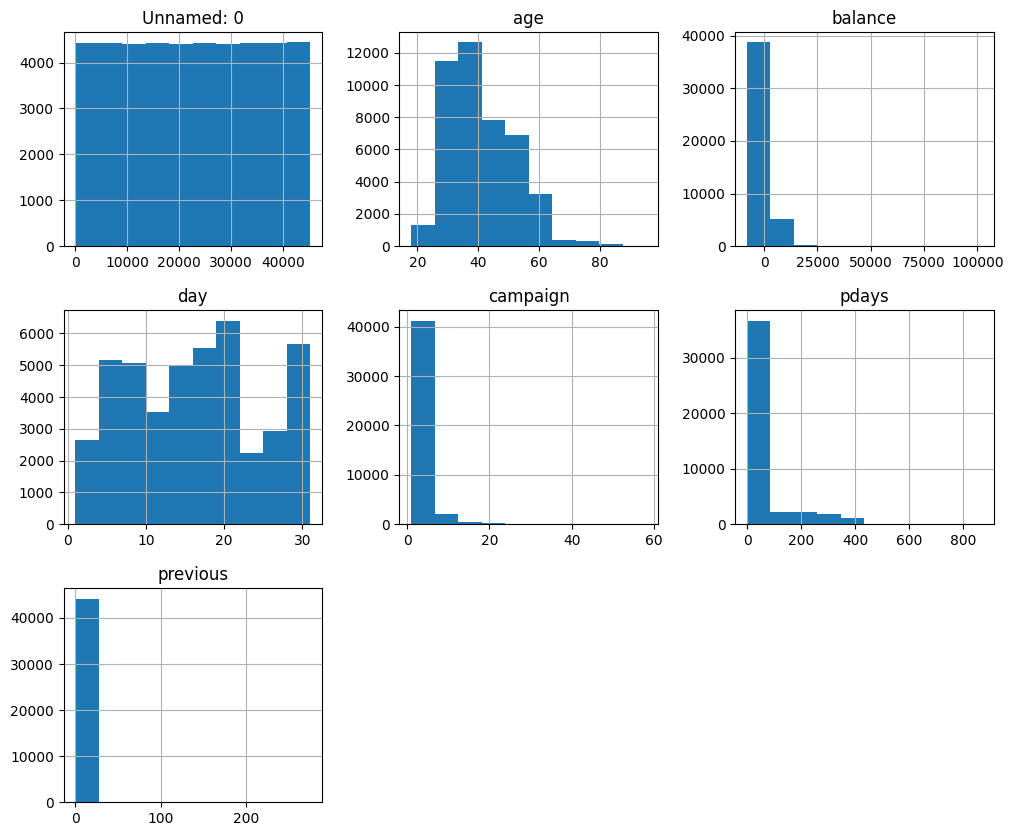

In [265]:

bank_train.hist(figsize=(12, 10))
plt.show()


#it shows that frequency of each column

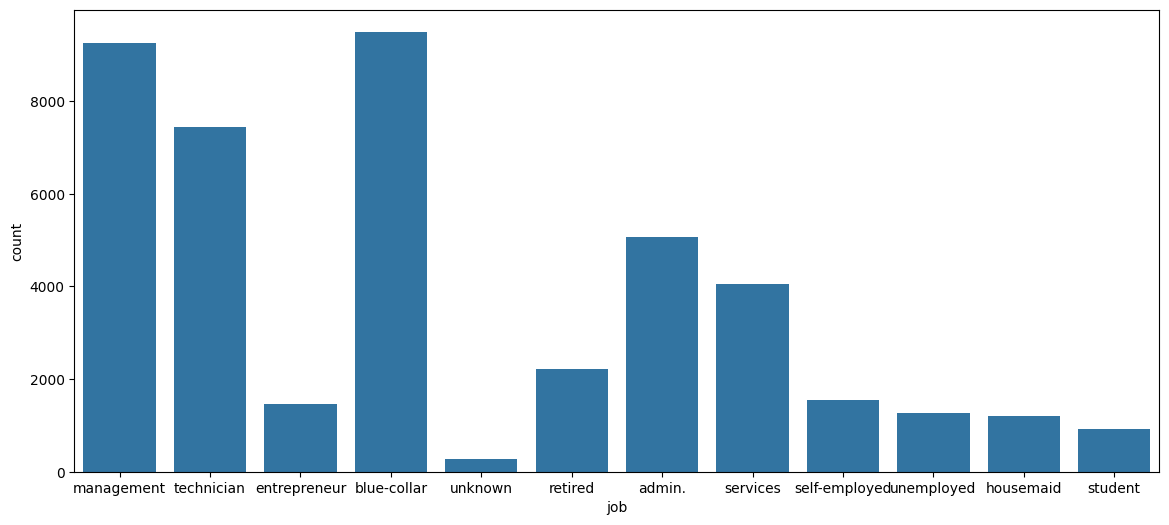

In [266]:
plt.figure(figsize=(14, 6))
sns.countplot(x='job', data=bank_train)
plt.show()


#above histogram its depicts the distribution of job across the diferent age groups

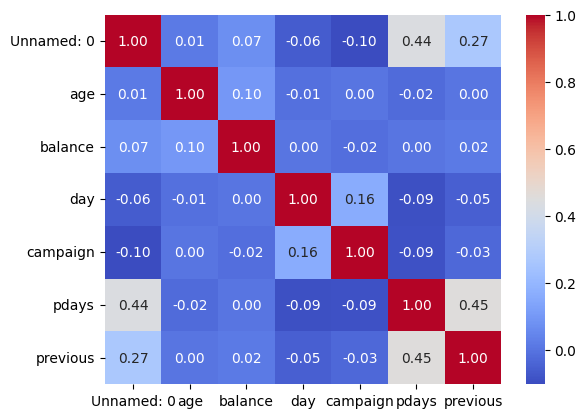

In [267]:
numeric_columns = bank_train.select_dtypes(include=['number'])
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()



#it shows that correlation between different features.

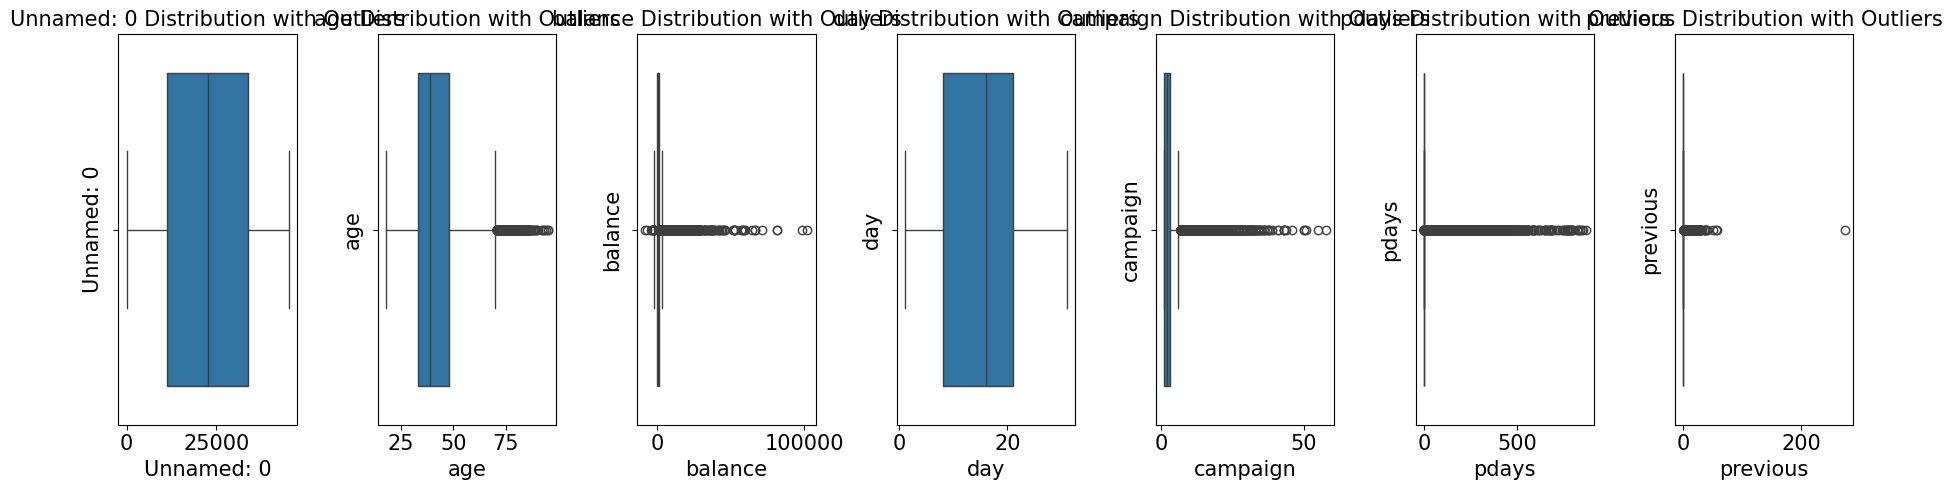

In [268]:
numeric_columns = bank_train.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(18, 5))
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=bank_train[column], ax=axes[i])
    axes[i].set_xlabel(column, fontsize=15)
    axes[i].set_ylabel(column, fontsize=15)
    axes[i].set_title(f'{column} Distribution with Outliers', fontsize=15)
    axes[i].tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.show()


#It generates the boxplots to visulize the distribution of numeric columns in dataset. It creates the boxplots showing the distribution of values and checks for outliers.

In [269]:
categorical_columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [270]:
bank_train = pd.get_dummies(bank_train, columns=categorical_columns)

for col in bank_train.columns:
    if bank_train[col].dtype == 'bool':
        bank_train[col] = bank_train[col].astype(int)

bank_train

,Unnamed: 0,age,balance,day,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,58,2143,5,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,44,29,5,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,2,33,2,5,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,3,47,1506,5,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,4,33,1,5,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44206,45206,51,825,17,3,-1,0,yes,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
44207,45207,71,1729,17,2,-1,0,yes,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
44208,45208,72,5715,17,5,184,3,yes,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
44209,45209,57,668,17,4,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [271]:
import pandas as pd
pd.set_option('display.max_columns', None)
bank_train.head(100)


,Unnamed: 0,age,balance,day,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,58,2143,5,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,44,29,5,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,2,33,2,5,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,3,47,1506,5,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,4,33,1,5,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,97,60,81,5,1,-1,0,no,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
96,98,39,0,5,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
97,99,46,229,5,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
98,100,44,-674,5,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [272]:
bank_train.columns

Index(['Unnamed: 0', 'age', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'y', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [273]:
bank_train.head()

,Unnamed: 0,age,balance,day,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,58,2143,5,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,44,29,5,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,2,33,2,5,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,3,47,1506,5,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,4,33,1,5,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [274]:
mapping = {'yes': 1, 'no': 0}

bank_train['y'] = bank_train['y'].map(mapping)

In [275]:
bank_train.dtypes

Unnamed: 0             int64
age                    int64
balance                int64
day                    int64
campaign               int64
pdays                  int64
previous               int64
y                      int64
job_admin.             int64
job_blue-collar        int64
job_entrepreneur       int64
job_housemaid          int64
job_management         int64
job_retired            int64
job_self-employed      int64
job_services           int64
job_student            int64
job_technician         int64
job_unemployed         int64
job_unknown            int64
marital_divorced       int64
marital_married        int64
marital_single         int64
education_primary      int64
education_secondary    int64
education_tertiary     int64
education_unknown      int64
default_no             int64
default_yes            int64
housing_no             int64
housing_yes            int64
loan_no                int64
loan_yes               int64
contact_cellular       int64
contact_teleph

In [283]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE


X = bank_train.drop('y', axis=1)
y = bank_train['y']

numeric_columns = X.select_dtypes(include=['number']).columns

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
    ])

classifier = LogisticRegression(random_state=42, max_iter=1000)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])


custom_scorer = make_scorer(f1_score)

f1_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring=custom_scorer)
accuracy_scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("Cross-validated F1-Score:", f1_scores.mean())
print("Cross-validated Accuracy:", accuracy_scores.mean())



Cross-validated F1-Score: 0.7815078720023511
Cross-validated Accuracy: 0.7706651287966166


In [284]:
import pandas as pd
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE

X = bank_train.drop('y', axis=1)
y = bank_train['y']

numeric_columns = X.select_dtypes(include=['number']).columns

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
    ])

classifier = SGDClassifier(random_state=42)

SGD_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', classifier)
])

custom_scorer = make_scorer(f1_score)

f1_scores = cross_val_score(SGD_model, X_resampled, y_resampled, cv=5, scoring=custom_scorer)
accuracy_scores = cross_val_score(SGD_model, X_resampled, y_resampled, cv=5, scoring='accuracy')

print("Cross-validated F1-Score:", f1_scores.mean())
print("Cross-validated Accuracy:", accuracy_scores.mean())


Cross-validated F1-Score: 0.7733793226638542
Cross-validated Accuracy: 0.7610534409842369


as the data is very much imbalanced which we have observed through EDA here we are setting the POS label as YES to eliminate bias and predicting the accuracy and F1 score.

In [278]:
bank_test.isnull().sum()

Unnamed: 0    0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
campaign      0
pdays         0
previous      0
poutcome      0
dtype: int64

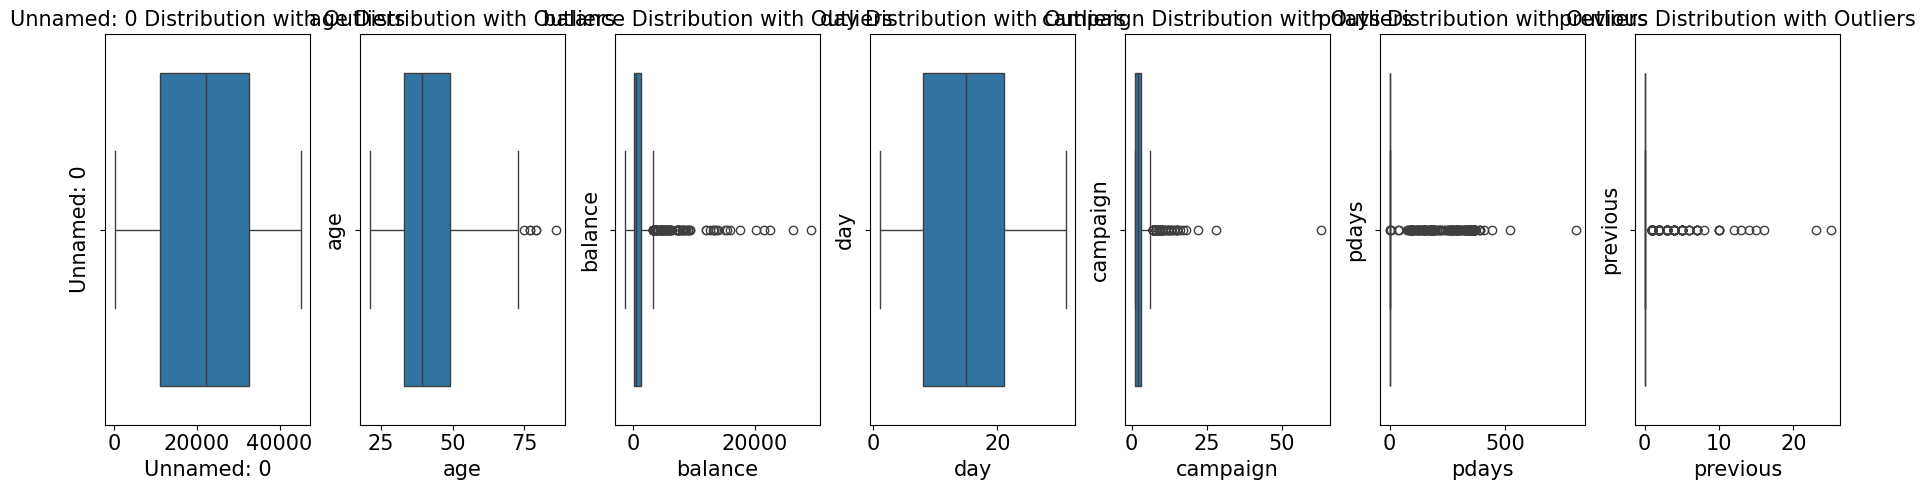

In [279]:
numeric_columns = bank_test.select_dtypes(include=['int64', 'float64']).columns
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(18, 5))
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=bank_test[column], ax=axes[i])
    axes[i].set_xlabel(column, fontsize=15)
    axes[i].set_ylabel(column, fontsize=15)
    axes[i].set_title(f'{column} Distribution with Outliers', fontsize=15)
    axes[i].tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 
plt.show()


In [280]:
categorical_columns_test=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [281]:
bank_test = pd.get_dummies(bank_test, columns=categorical_columns_test)

for col in bank_test.columns:
    if bank_test[col].dtype == 'bool':
        bank_test[col] = bank_test[col].astype(int)

bank_test

,Unnamed: 0,age,balance,day,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,42442,52,657,7,2,217,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,30164,34,0,5,6,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2,9921,38,359,9,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,31817,58,189,8,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,10333,43,2478,12,1,-1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,10169,38,-10,11,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
996,29507,56,5496,3,3,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
997,39597,60,846,26,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
998,11892,36,1313,20,10,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [292]:
bank_test1 = pd.read_csv("bank_test.csv")
model.fit(X_resampled, y_resampled)
predicted_vals = model.predict(bank_test)
bank_test1['Predicted_Value'] = predicted_vals

In [293]:
bank_test1.to_csv('answers.csv', index= False)